<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: West Nile Virus Prediction

---
## Problem Statement
Due to the recent epidemic of West Nile Virus in the Windy City, the Department of Public Health has set up a surveillance and control system in hope to learn something from the mosquito population. In order to curb the epidemic, pesticides will have to be deployed through the city. A more accurate method of predicting outbreaks of West Nile virus in mosquitos will help the City of Chicago and CPHD more efficiently and effectively allocate resources towards preventing transmission of this potentially deadly virus. 

The Department of Public Health has engaged us, an independent Data Science company, to derive an effective plan using data science methods to deploy these pesiticides. We would have to make recommendations on where pesticides should be sprayed and the cost vs benefit of deploying these pesticides.

## Contents:

- [Background](#Background)
- [Datasets Used](#Datasets-Used)
- [Data Dictionaries](#Data-Dictionaries)
- [Data Import & Data Cleaning](#Data-Import-&-Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Feature Engineering](#Feature-Engineering)

## Background

West Nile virus is most commonly spread to humans through infected mosquitos. Around 20% of people who become infected with the virus develop symptoms ranging from a persistent fever, to serious neurological illnesses that can result in death.

In 2002, the first human cases of West Nile virus were reported in Chicago. By 2004 the City of Chicago and the Chicago Department of Public Health (CDPH) had established a comprehensive surveillance and control program that is still in effect today.

Every week from late spring through the fall, mosquitos in traps across the city are tested for the virus. The results of these tests influence when and where the city will spray airborne pesticides to control adult mosquito populations.

## Datasets Used

For the purpose of the analysis, we are provided with the `train`, `test`, `spray` and `weather` datasets. 

The `train` dataset consists of data from 2007, 2009, 2011 and 2013. We will be using this dataset for model building purposes. The `test` dataset consists of data from 2008, 2010, 2012 and 2014. We will be predicting the mosquito population information using this dataset. 

The `spray` dataset consists of Geographic Information Mapping (GIS) data for the spray efforts in 2011 and 2013. Spraying can reduce the number of mosquitos in the area, and therefore might eliminate the appearance of West Nile virus. 

The `weather` dataset consists of weather conditions of 2007 to 2014, during the months of the tests. It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet. 

Please refer to data dictionaries below for the full infomation found in the datasets.

## Data Dictionary

Three main datasets were used in this project. The data dictionaries of the datasets can be found below.

<br>**Dataset name: `train`**
<br>This dataset contains data from 2007, 2009, 2011, and 2013.

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|date|datetime|train| Date that the WNV test is performed.|
|address|string|train| Approximate address of the location of trap. This is used to send to the GeoCoder. |
|species|string|train| The species of mosquitos.|
|block|integer|train| Block number of address.|
|street|string|train| Street name.|
|trap|string|train| Id of the trap.|
|addressnumberandstreet|string|train| Approximate address returned from GeoCoder.|
|latitude|float|train| Latitude returned from GeoCoder.|
|longitude|float|train| Longitude returned from GeoCoder.|
|addressaccuracy|integer|train| Accuracy returned from GeoCoder.|
|nummosquitos|integer|train| Number of mosquitoes caught in this trap.|
|wnvpresent|integer|train| Whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present.|

<br>**Dataset name: `test`**
<br>This dataset contains data from 2007, 2009, 2011, and 2013.

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|id|string|test| The id of the record.|
|date|datetime|test| Date that the WNV test is performed.|
|address|string|test| Approximate address of the location of trap. This is used to send to the GeoCoder. |
|species|string|test| The species of mosquitos.|
|block|integer|test| Block number of address.|
|street|string|test| Street name.|
|trap|string|test| Id of the trap.|
|addressnumberandstreet|*string*|test| Approximate address returned from GeoCoder.|
|latitude|float|test| Latitude returned from GeoCoder.|
|longitude|float|test| Longitude returned from GeoCoder.|
|addressaccuracy|integer|test| Accuracy returned from GeoCoder.|

<br>**Dataset name: `spray`**
<br>This dataset contains the GIS data of spraying efforts in 2011 and 2013.

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|date|datetime|spray|The date and time of the spray.|
|time|string|spray|The date and time of the spray.|
|Latitude|string|spray|The Latitude of the spray.|
|Longitude|string|spray|The Longitude of the spray.|


<br>**Dataset name: `weather`**
<br>This dataset contains the weather data from 2007 to 2014.

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|station|integer|weather|Station ID.|
|date|datetime|weather|Date of the weather data.|
|tmax|integer|weather|Maximum temperature in Degrees Fahrenheit.|
|tmin|integer|weather|Minimum temperature in Degrees Fahrenheit.|
|tavg|integer|weather|Average temperature in Degrees Fahrenheit.|
|depart|integer|weather|Departure from normal temperature in Degrees Fahrenheit.|
|dewpoint|integer|weather|Average dew point in Degrees Fahrenheit.|
|wetbulb|integer|weather|Average wet bulb in Degrees Fahrenheit.|
|heat|integer|weather|Absolute temperature difference of average temperature (Tavg) from base 65 deg Fahrenheit for Tavg >=65|
|cool|integer|weather|Absolute temperature difference of average temperature (Tavg) from base 65 deg Fahrenheit for Tavg <=65|
|sunrise|string|weather|Sunrise timing in 24H format. (Calculated, not observed)|
|sunset|string|weather|Sunset timing in 24H format. (Calculated, not observed)|
|codesum|string|weather|Significant weather types.|
|depth|integer|weather|Snowfall in inches.|
|water1|integer|weather|Amount of water equivalent from melted snow.|
|snowfall|float|weather|Snowfall in precipitation.|
|preciptotal|float|weather|Water equivalent(Inches & Hundredths(2400 Local Standard Time). Rainfall & melted snow.|
|stnpressure|float|weather|Average station pressure. Inches of HG.|
|sealevel|float|weather|Average sea level pressure. Inches of HG.|
|resultspeed|float|weather|Resultant wind speed. Speed in miles per hour.|
|resultdir|float|weather|Resultant wind direction. To tens of degrees. Whole degrees.|
|avgspeed|float|weather|Average wind speed. Speed in miles per hour.|

## Data Import & Data Cleaning

Please refer to Project 4 Part 1 - Data Cleaning.

## Exploratory Data Analysis

Please refer to Project 4 Part 2 - EDA.

## Feature Engineering

### Importing the neccessary libraries and packages.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', 200)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load datasets
train1 = pd.read_csv('../dataset/train_df_cleaned2.csv')
test = pd.read_csv('../dataset/test_df_cleaned2.csv')
weather1 = pd.read_csv('../dataset/weather_df_cleaned2.csv')
spray = pd.read_csv('../dataset/spray_df_cleaned.csv')

In [3]:
train1.head()

,Unnamed: 0,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,year,month,week,dayofweek
0,0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,22,1
1,1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,22,1
2,2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,5,22,1
3,3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,5,22,1
4,4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,5,22,1


In [4]:
# Drop information from station 2 as it is not required
weather1 = weather1[weather1['station'] == 1]
weather1.head()

,Unnamed: 0,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,week,dayofweek
0,0,1,2007-05-01,83,50,67,14,51,56,0,...,0.00,29.10,29.82,1.7,27,9.2,2007,5,18,1
2,2,1,2007-05-02,59,42,51,-3,42,47,14,...,0.00,29.38,30.09,13.0,4,13.4,2007,5,18,2
4,4,1,2007-05-03,66,46,56,2,40,48,9,...,0.00,29.39,30.12,11.7,7,11.9,2007,5,18,3
6,6,1,2007-05-04,66,49,58,4,41,50,7,...,0.15,29.31,30.05,10.4,8,10.8,2007,5,18,4
8,8,1,2007-05-05,66,53,60,5,38,49,5,...,0.15,29.40,30.10,11.7,7,12.0,2007,5,18,5


### Preparation for Engineering

In [5]:
# This gives me a more precise means of accessing certain weeks in a specific year
def year_week(row):
    week = row['week']
    year = row['year']
    row['yearweek'] = f'{year}{week}'
    row['yearweek'] = int(row['yearweek'])
    return row

In [6]:
train1 = train1.apply(year_week, axis=1)
weather1 = weather1.apply(year_week, axis=1)

### Relative Humidity

According to our EDA, excessive humidity is believed to be a significant role in the propagation of the West Nile virus because it has been found to boost mosquito activity, larval indices, and egg production. According to other studies, the ideal range of humidity to stimulate mosquito flight activity is between 44% and 69%, with 65% serving as the focal point.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7068582/

https://bmcnoldy.rsmas.miami.edu/Humidity.html

We would like to combine dew point and average temperature to form relative humidity.

    TD is dew point temperature,
    T is average temperature,
    Relative Humidity: =100*(EXP((17.625*TD)/(243.04+TD))/EXP((17.625*T)/(243.04+T)))

To calculate Relative Humidity, we need to change our features from Fahrenheit to Celcius

In [7]:
def celsius(x):
    c = ((x - 32) * 5.0)/9.0
    return float(c)

In [8]:
weather1['tavgc'] = weather1['tavg'].apply(celsius)
weather1['tminc'] = weather1['tmin'].apply(celsius)
weather1['tmaxc'] = weather1['tmax'].apply(celsius)
weather1['dewpointc'] = weather1['dewpoint'].apply(celsius)

In [9]:
def r_humid(row):
    row['r_humid'] = round(100*(math.exp((17.625*row['dewpointc'])/(243.04+row['dewpointc'])) \
                          / math.exp((17.625*row['tavgc'])/(243.04+row['tavgc']))))
    return row

In [10]:
weather1 = weather1.apply(r_humid, axis=1)

In [11]:
# Dropping as Celcius features are no longer needed
weather1 = weather1.drop(columns=['tavgc', 'tminc', 'tmaxc', 'dewpointc','Unnamed: 0'])
weather1.sort_values(by='r_humid', ascending=False).head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,sealevel,resultspeed,resultdir,avgspeed,year,month,week,dayofweek,yearweek,r_humid
2574,1,2013-10-31,64,46,55,9,56,57,10,0,...,29.45,9.4,24,11.5,2013,10,44,3,201344,104
2572,1,2013-10-30,63,43,53,7,52,53,12,0,...,30.00,6.6,15,7.5,2013,10,44,2,201344,96
2188,1,2012-10-22,65,49,57,7,56,57,8,0,...,29.92,4.0,20,6.5,2012,10,43,0,201243,96
1528,1,2011-05-29,70,52,61,-3,59,60,4,0,...,29.86,3.6,11,5.7,2011,5,21,6,201121,93
1526,1,2011-05-28,62,51,57,-6,55,55,8,0,...,29.83,6.0,18,6.7,2011,5,21,5,201121,93


In [12]:
weather1['r_humid'].mean()

63.41915760869565

Note: The average humidity in Chicago could be a factor in the spread of the West Nile Virus.

Due to supersaturation, relative humidity can go above 100%. As the RH reaches 100%, water vapor starts to condense onto air pollutants (such dust or salt particles) and clouds or fog start to form.

https://www.chicagotribune.com/news/ct-xpm-2011-07-20-ct-wea-0720-asktom-20110720-story.html

### Weekly Average Precipitation

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4342965/#RSTB20130561C42

It's commonly believed that above-average precipitation causes mosquito populations to rise and raises the risk of illness outbreaks like the West Nile Virus. Numerous studies have supported this positive link, however precipitation can be a little more complicated because it may dilute the nutrients available to larvae, slowing their pace of development. It might also lead to a negative association by flushing ditches and drainage channels used by Culex larvae.

Precipitation is still important to research, though. We can take into account cumulative weekly precipitation to develop a feature assessing weeks with significant rain, as opposed to looking at daily precipitation amounts that probably have no bearing on the occurrence of WNV on that specific day.

In [13]:
weather1 = weather1.apply(year_week, axis=1)

In [14]:
# Setting up grouped df for calculation of cumulative weekly precipitation
group_df = weather1.groupby('yearweek').sum()

In [15]:
def weekpreciptotal(row):
    yearweek = row['yearweek']
    row['weekpreciptotal'] = group_df.loc[yearweek]['preciptotal']
    return row

In [16]:
weather1 = weather1.apply(weekpreciptotal, axis=1)
weather1.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,resultspeed,resultdir,avgspeed,year,month,week,dayofweek,yearweek,r_humid,weekpreciptotal
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,1.7,27,9.2,2007,5,18,1,200718,56,0.3
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,13.0,4,13.4,2007,5,18,2,200718,71,0.3
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,11.7,7,11.9,2007,5,18,3,200718,55,0.3
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,10.4,8,10.8,2007,5,18,4,200718,53,0.3
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,11.7,7,12.0,2007,5,18,5,200718,44,0.3


### Weekly Average Temperature

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4342965/

The most important factor linked to West Nile Virus outbreaks, according to research, is temperature. High temperatures have been shown to positively correlate with a number of factors, including viral replication rates, the seasonal phenology of mosquito host populations, the growth rates of vector populations, the viral transmission effectiveness to birds, and geographic variations in the incidence of human cases.

We'll also look at average temps by week rather than just the daily temperature.

In [17]:
def weekavgtemp(row):
    # Retrieve current week
    yearweek = row['yearweek']
    
    # Retrieving sum of average temperature for current week
    temp_sum = group_df.loc[yearweek]['tavg']
    
    # Getting number of days recorded by weather station for current week
    n_days = weather1[weather1['yearweek'] == yearweek].shape[0]
    
    # Calculate Week Average Temperature
    row['weekavgtemp'] = temp_sum / n_days
    
    return row

In [18]:
weather1 = weather1.apply(weekavgtemp, axis=1)
weather1.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,resultdir,avgspeed,year,month,week,dayofweek,yearweek,r_humid,weekpreciptotal,weekavgtemp
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,27,9.2,2007,5,18,1,200718,56,0.3,58.5
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,4,13.4,2007,5,18,2,200718,71,0.3,58.5
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,7,11.9,2007,5,18,3,200718,55,0.3,58.5
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,8,10.8,2007,5,18,4,200718,53,0.3,58.5
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,7,12.0,2007,5,18,5,200718,44,0.3,58.5


### Temporal Features

Source: https://pubmed.ncbi.nlm.nih.gov/30145430/

According to certain studies, rising temperatures and precipitation may have a delayed direct impact on the frequency of WNV infection. Given that most Culex mosquitoes lay their eggs for 7–10 days on average, prior weeks' temperatures, humidity, and precipitation may have contributed to a higher mosquito population in the coming weeks. The CDC states that eggs are prepared to hatch anywhere between a few days and several months after being placed. As a result, we'll make some time-lagged variables that start one month in the past.

Therefore we will computing these:
- Average Temperature (1 week - 4 weeks before)
- Cumulative Weekly Precipitation (1 week - 4 weeks before)
- Relative Humidity (1 week - 4 weeks before)

In [19]:
# For the Average Temperature (1 week - 4 weeks before)

def create_templag(row):   
    # Getting average temperature one week before
    yearweek = row['yearweek']
    
    # Calculating average temperature for up to four weeks before
    for i in range(4):
        try:
            row[f'templag{i+1}'] = weather1[weather1['yearweek'] == (yearweek - (i+1))]['weekavgtemp'].unique()[0]
            
        # For the first 4 weeks of the year where no previous data exists, create rough estimate of temperatures
        except IndexError:
            row[f'templag{i+1}'] = row['weekavgtemp'] - i
    return row

In [20]:
# Cumulative Weekly Precipitation (1 week - 4 weeks before)

def create_rainlag(row):
    # Getting average temperature one week before
    yearweek = row['yearweek']
    
    # Calculating average temperature for up to four weeks before
    for i in range(4):
        try:
            row[f'rainlag{i+1}'] = weather1[weather1['yearweek'] == (yearweek - (i+1))]['weekpreciptotal'].unique()[0]
            
        # Use average of column if no data available
        except IndexError:
            row[f'rainlag{i+1}'] = weather1['weekpreciptotal'].mean()
    return row

In [21]:
# For Relative Humidity (1 week - 4 weeks before)

def create_humidlag(row):
    # Getting average temperature one week before
    yearweek = row['yearweek']
    
    # Calculating average temperature for up to four weeks before
    for i in range(4):
        try:
            row[f'humidlag{i+1}'] = weather1[weather1['yearweek'] == (yearweek - (i+1))]['r_humid'].unique()[0]
            
        # Use average of column if no data available
        except IndexError:
            row[f'humidlag{i+1}'] = weather1['r_humid'].mean()
    return row

In [22]:
weather1 = weather1.apply(create_templag, axis=1)
weather1 = weather1.apply(create_rainlag, axis=1)
weather1 = weather1.apply(create_humidlag, axis=1)
weather1.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,templag3,templag4,rainlag1,rainlag2,rainlag3,rainlag4,humidlag1,humidlag2,humidlag3,humidlag4
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,56.5,55.5,1.043417,1.043417,1.043417,1.043417,63.419158,63.419158,63.419158,63.419158
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,56.5,55.5,1.043417,1.043417,1.043417,1.043417,63.419158,63.419158,63.419158,63.419158
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,56.5,55.5,1.043417,1.043417,1.043417,1.043417,63.419158,63.419158,63.419158,63.419158
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,56.5,55.5,1.043417,1.043417,1.043417,1.043417,63.419158,63.419158,63.419158,63.419158
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,56.5,55.5,1.043417,1.043417,1.043417,1.043417,63.419158,63.419158,63.419158,63.419158


In [23]:
# Checking that temperature lagged variables are correct
weather1.groupby(by='yearweek').mean()[['weekavgtemp', 'templag1', 'templag2', 'templag3', 'templag4']].tail(5)

,weekavgtemp,templag1,templag2,templag3,templag4
yearweek,,,,,
201440,55.714286,64.142857,61.428571,58.857143,73.285714
201441,52.142857,55.714286,64.142857,61.428571,58.857143
201442,52.714286,52.142857,55.714286,64.142857,61.428571
201443,53.285714,52.714286,52.142857,55.714286,64.142857
201444,49.200000,53.285714,52.714286,52.142857,55.714286


### Trap

We also discovered, during our exploratory data analysis, that several traps contained incredibly high numbers of mosquitoes and, consequently, high numbers of WnvPresent. We chose to one-hot encode each mosquito trap so that we could later compare them to our target variable.

In [24]:
train1 = pd.get_dummies(train1, columns=['trap'])
train1 = train1.drop(columns=['Unnamed: 0'])
train1.head()

,date,address,species,block,street,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,...,trap_T230,trap_T231,trap_T232,trap_T233,trap_T235,trap_T236,trap_T237,trap_T238,trap_T900,trap_T903
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,0,0,0,0,0,0,0,0,0,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,...,0,0,0,0,0,0,0,0,0,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,...,0,0,0,0,0,0,0,0,0,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,...,0,0,0,0,0,0,0,0,0,0


### Species

We also observed that there were only three species that were known to be WNV carriers. These species are the CULEX PIPIENS/RESTUANS, CULEX RESTUANS and CULEX PIPIENS. Noticeably, the incidence of the WNV in CULEX RESTUANS was 0.002 (49 positive pools vs 23431 mosquitos), while the incidence of the WNV in CULEX PIPIENS/RESTUANS was 0.004 (262 positive pools vs 66268 mosquitos). In CULEX PIPIENS, the incidence of WNV was measured at 0.005 (240 positive pools vs 44671 mosquitos).

Given this relationship, we placed a lighter weight on the CULEX RESTUANS, while assigning no weight to species that weren't identified as WNV carriers by the data.

In [25]:
# WnvPresent by species
train1[['species', 'wnvpresent']].groupby('species').sum()

,wnvpresent
species,
CULEX ERRATICUS,0
CULEX PIPIENS,240
CULEX PIPIENS/RESTUANS,262
CULEX RESTUANS,49
CULEX SALINARIUS,0
CULEX TARSALIS,0
CULEX TERRITANS,0


In [26]:
train1['species'] = train1['species'].map({'CULEX PIPIENS/RESTUANS': 2, 'CULEX PIPIENS': 2, 'CULEX RESTUANS': 1}) \
                                   .fillna(0)

In [27]:
# Checking species value count
train1['species'].value_counts()

2.0    7451
1.0    2740
0.0     315
Name: species, dtype: int64

### Feature Selection

As was already noted, the correlation between our attributes and our target was often pretty low. A notable solution to this is polynomial feature engineering; by merging or manipulating features, one may frequently considerably increase the feature's correlation to the objective.

Additionally, we can find interesting correlations between our variables.

In [28]:
# Dropping NumMosquitos as it isn't present within test data
train1 = train1.drop(columns='nummosquitos')

### Polynomial Feature Engineering

In [29]:
train_weather = pd.merge(train1, weather1, on=['date', 'year', 'week', 'month', 'yearweek', 'dayofweek'])

In [30]:
X = train_weather[[col for col in train_weather.columns if 'wnvpresent' not in col]]._get_numeric_data()
y = train1['wnvpresent']

In [31]:
# Generates the full polynomial feature table
poly = PolynomialFeatures(include_bias=False, degree=2)
X_poly = poly.fit_transform(X)
X_poly.shape

(10506, 16109)

In [32]:
# Adds appropriate feature names to all polynomial features
X_poly = pd.DataFrame(X_poly,columns=poly.get_feature_names(X.columns))

# Generates list of poly feature correlations
X_poly_corrs = X_poly.corrwith(y)

# Shows features most highly correlated (positively) with target
X_poly_corrs.sort_values(ascending=False).head(20)

sunrise weekavgtemp    0.151130
sunrise templag2       0.146983
sunrise templag3       0.146571
dewpoint sunrise       0.145358
wetbulb sunrise        0.145238
week dewpoint          0.144489
sunrise templag1       0.143956
month dewpoint         0.140765
week weekavgtemp       0.140455
week wetbulb           0.140317
tmin sunrise           0.138671
week templag2          0.138182
week tmin              0.136529
week templag3          0.136459
month wetbulb          0.135538
tavg sunrise           0.134575
month templag3         0.134174
templag2 templag3      0.132705
week templag1          0.132121
month tmin             0.131852
dtype: float64

Naturally, all of our top features involve a temperature variable of some kind. We'll choose just three features from this list in order to avoid multicollinearity our model.

In [33]:
# Creating interaction features -- only 3 due to multicollinearity issues
train_weather['sunrise_weekavgtemp'] = train_weather['sunrise'] * train_weather['weekavgtemp']
train_weather['sunrise_wetbulb'] = train_weather['sunrise'] * train_weather['wetbulb']
train_weather['week_weekavgtemp'] = train_weather['week'] * train_weather['weekavgtemp']

In [34]:
cm = abs(train_weather.corr()['wnvpresent']).sort_values(ascending=False)

In [35]:
print(cm)

wnvpresent             1.000000
sunrise_weekavgtemp    0.151130
sunrise_wetbulb        0.145238
week_weekavgtemp       0.140455
templag3               0.120546
templag2               0.105395
sunrise                0.105227
week                   0.104171
species                0.103477
month                  0.100143
dewpoint               0.090460
templag4               0.087163
wetbulb                0.082938
weekpreciptotal        0.075938
tmin                   0.072719
sunset                 0.068451
templag1               0.066270
tavg                   0.066043
longitude              0.060345
cool                   0.058953
weekavgtemp            0.057341
heat                   0.056813
depart                 0.055436
r_humid                0.054922
yearweek               0.053012
resultspeed            0.051177
year                   0.050865
tmax                   0.050536
humidlag1              0.049109
trap_T900              0.044220
humidlag4              0.039174
humidlag

We will now try to remove some variables that have a very weak association to our aim. The majority of these variables are our one-hot-encoded trap feature.

In [36]:
# Variables with less than 2% correlation to WnvPresent
cols_to_drop = cm[cm < 0.02].index
cols_to_drop

Index(['preciptotal', 'trap_T013', 'trap_T230', 'trap_T014', 'trap_T148',
       'trap_T016', 'trap_T043', 'trap_T018', 'trap_T212', 'trap_T145',
       ...
       'trap_T138', 'trap_T097', 'trap_T162', 'trap_T156', 'trap_T039',
       'trap_T142', 'trap_T227', 'trap_T033', 'trap_T066', 'trap_T226'],
      dtype='object', length=133)

In [37]:
train_weather = train_weather.drop(columns=cols_to_drop)
train_weather.shape

(10506, 54)

<AxesSubplot:>

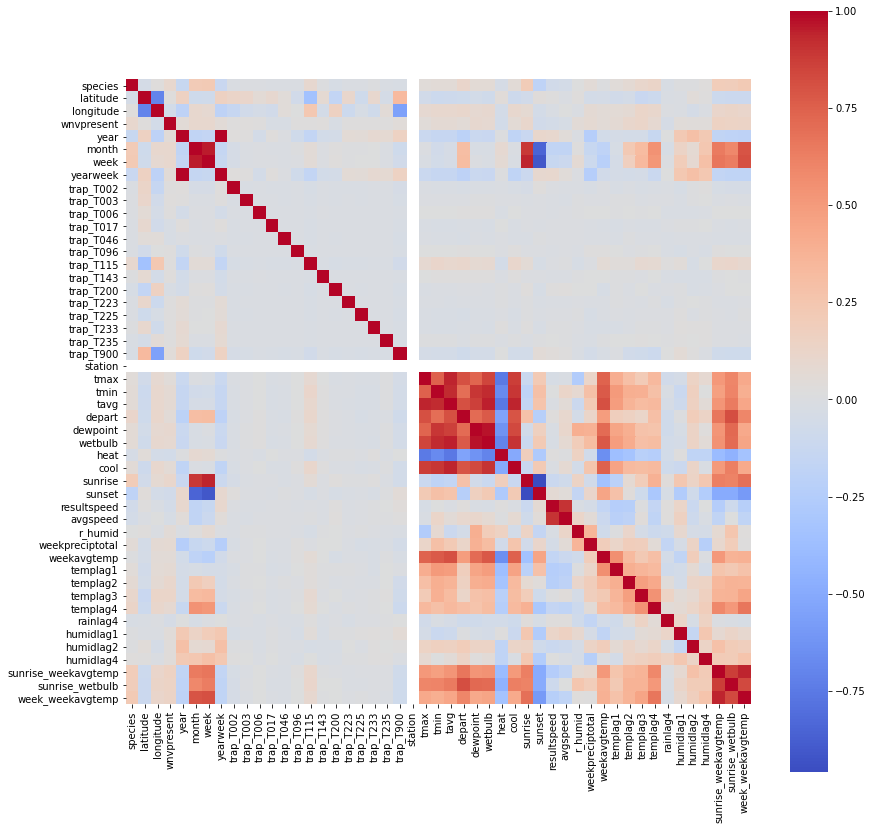

In [38]:
plt.figure(figsize=(14, 14))
sns.heatmap(train_weather.corr(), cmap='coolwarm', square=True)

### Selecting Top Features

In [39]:
cm = abs(train_weather.corr()['wnvpresent']).sort_values(ascending=False)
cols_to_keep = cm.head(40)
cols_to_keep

wnvpresent             1.000000
sunrise_weekavgtemp    0.151130
sunrise_wetbulb        0.145238
week_weekavgtemp       0.140455
templag3               0.120546
templag2               0.105395
sunrise                0.105227
week                   0.104171
species                0.103477
month                  0.100143
dewpoint               0.090460
templag4               0.087163
wetbulb                0.082938
weekpreciptotal        0.075938
tmin                   0.072719
sunset                 0.068451
templag1               0.066270
tavg                   0.066043
longitude              0.060345
cool                   0.058953
weekavgtemp            0.057341
heat                   0.056813
depart                 0.055436
r_humid                0.054922
yearweek               0.053012
resultspeed            0.051177
year                   0.050865
tmax                   0.050536
humidlag1              0.049109
trap_T900              0.044220
humidlag4              0.039174
humidlag

In [40]:
final_train_df = train_weather[cols_to_keep.keys()]

### Prepare Train & Test for Modelling

In [41]:
test.head()

,Unnamed: 0,id,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,year,month,week,dayofweek
0,0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,24,2
1,1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,24,2
2,2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,24,2
3,3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,24,2
4,4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,24,2


In [42]:
test = pd.get_dummies(test, columns=['trap'])

In [43]:
test['date'] = pd.to_datetime(test['date'])

In [44]:
test['species'] = test['species'].map({'CULEX PIPIENS/RESTUANS': 2, 'CULEX PIPIENS': 2, 'CULEX RESTUANS': 1}).fillna(0)

In [45]:
print(test.shape)

(116293, 164)


In [46]:
weather1['date'] = pd.to_datetime(weather1['date'])
merged_test_df = pd.merge(test, weather1)

display(merged_test_df.head())

,Unnamed: 0,id,date,address,species,block,street,addressnumberandstreet,latitude,longitude,...,templag3,templag4,rainlag1,rainlag2,rainlag3,rainlag4,humidlag1,humidlag2,humidlag3,humidlag4
0,0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",2.0,41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,54.285714,54.285714,2.96,0.89,0.3,0.22,51.0,87.0,52.0,68.0
1,1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",1.0,41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,54.285714,54.285714,2.96,0.89,0.3,0.22,51.0,87.0,52.0,68.0
2,2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",2.0,41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,54.285714,54.285714,2.96,0.89,0.3,0.22,51.0,87.0,52.0,68.0
3,3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",0.0,41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,54.285714,54.285714,2.96,0.89,0.3,0.22,51.0,87.0,52.0,68.0
4,4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",0.0,41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,54.285714,54.285714,2.96,0.89,0.3,0.22,51.0,87.0,52.0,68.0


In [47]:
merged_test_df.columns

Index(['Unnamed: 0', 'id', 'date', 'address', 'species', 'block', 'street',
       'addressnumberandstreet', 'latitude', 'longitude',
       ...
       'templag3', 'templag4', 'rainlag1', 'rainlag2', 'rainlag3', 'rainlag4',
       'humidlag1', 'humidlag2', 'humidlag3', 'humidlag4'],
      dtype='object', length=198)

In [48]:
merged_test_df['sunrise_weekavgtemp'] = merged_test_df['sunrise'] * merged_test_df['weekavgtemp']
merged_test_df['sunrise_wetbulb'] = merged_test_df['sunrise'] * merged_test_df['wetbulb']
merged_test_df['week_weekavgtemp'] = merged_test_df['week'] * merged_test_df['weekavgtemp']

In [49]:
# Select columns to keep in the test dataset
test_cols_to_keep = cols_to_keep.keys().drop('wnvpresent')
final_test_df = merged_test_df[test_cols_to_keep]

In [50]:
# Checking for missing columns
[col for col in final_test_df if col not in final_train_df], [col for col in final_train_df if col not in final_test_df]

([], ['wnvpresent'])

In [51]:
final_train_df.shape

(10506, 40)

In [52]:
final_test_df.shape

(116293, 39)

In [53]:
final_train_df.isnull().sum()[final_train_df.isnull().sum() > 0]

Series([], dtype: int64)

In [54]:
final_test_df.isnull().sum()[final_train_df.isnull().sum() > 0]

Series([], dtype: int64)

### Export for model

In [55]:
final_train_df.to_csv('../dataset/final_train.csv', index=False)

In [56]:
final_test_df.to_csv('../dataset/final_test.csv', index=False)

Now that we have done the feature engineering, we will move on to modelling.